In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Generate data

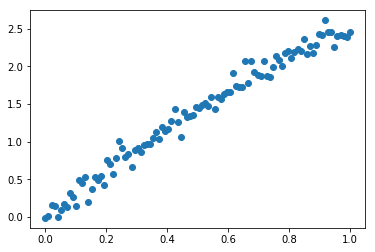

In [60]:
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

$$ y_{pred} = a*x + b $$

In [61]:
a = 1
b = 0
y_ = a*x + b

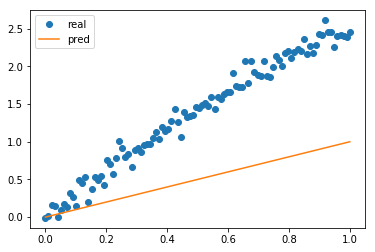

In [62]:
def plot():
    plt.plot(x, y, 'o', label='real')
    plt.plot(x, y_, label='pred')
    plt.legend()
    plt.show()
    
plot()

In [63]:
def L(y, y_): return ((y - y_)**2).mean()
L(y, y_)

0.9819377867718029

In [64]:
def gradients(x, y, y_):
    da = (-2 * x * (y - y_)).mean()
    db = (-2 * (y - y_)).mean()
    return da, db

gradients(x, y, y_)

(-1.1375868257320065, -1.753461055878069)

In [65]:
# initial params
a = 1
b = 0
lr = 0.1
steps = 1000

a = 2.5341
b = 0.1097
loss = 0.0132


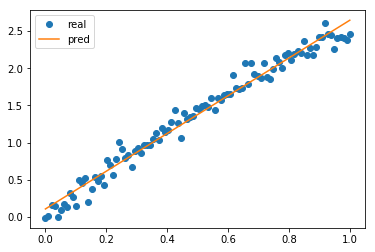

In [66]:
for i in range(steps):
    y_ = a*x + b
    loss = L(y, y_)
    da, db = gradients(x, y, y_)
    a -= da*lr
    b -= db*lr
    
print(f'a = {a:.4f}')
print(f'b = {b:.4f}')
print(f'loss = {loss:.4f}')
plot()

# Multiple linear regression

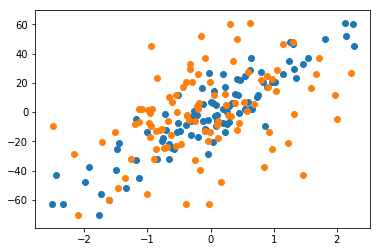

In [67]:
from sklearn.datasets import make_regression
n = 100
x, y = make_regression(n, 2, noise=0.1)
plt.scatter(x[:,0], y)
plt.scatter(x[:,1], y);

In [68]:
x.shape

(100, 2)

In [69]:
a = 1
b = 1
c = 0
y_ = a*x[:,0] + b*x[:,1] + c

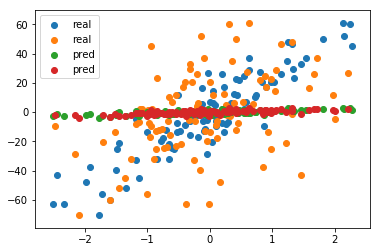

In [70]:
plt.scatter(x[:,0], y, label='real')
plt.scatter(x[:,1], y, label='real')
plt.scatter(x[:,0], y_, label='pred')
plt.scatter(x[:,1], y_, label='pred')
plt.legend();

In [71]:
L(y, y_)

697.4815775001097

In [77]:
# initial params
a = 1
b = 1
c = 0
lr = 0.1
steps = 1000

In [88]:
def gradients_mult(x, y, y_):
    da = (-2 * x[:,0] * (y - y_)).mean()
    db = (-2 * x[:,1] * (y - y_)).mean()
    dc = (-2 * (y - y_)).mean()
    return da, db, dc

gradients_mult(x, y, y_)

(-48.48321798886523, -20.270417577817167, 2.8894808757388133)

In [79]:
for i in range(steps):
    y_ = a*x[:,0] + b*x[:,1] + c
    loss = L(y, y_)
    da, db, dc = gradients_mult(x, y, y_)
    a -= da*lr
    b -= db*lr
    
print(f'a = {a:.4f}')
print(f'b = {b:.4f}')
print(f'loss = {loss:.4f}')

a = 24.9747
b = 12.4735
loss = 0.0090


# Using matrices
http://matrixmultiplication.xyz/

In [81]:
w = np.ones([x.shape[1], 1])
b = 0
y_ = x @ w + b
y_ = y_.ravel()

In [85]:
L(y, y_)

697.4815775001097

In [92]:
def gradients_matrices(x, y, y_):
    dw = (-2 * x.T @ (y - y_)[:, None]) / len(x)
    db = (-2 * (y - y_)).mean()
    return dw, db

gradients_matrices(x, y, y_)

(array([[-48.48321799],
        [-20.27041758]]), 2.8894808757388133)

In [93]:
# initial params
w = np.ones([x.shape[1],1])
b = 0
lr = 0.1
steps = 1000

In [94]:
for i in range(steps):
    y_ = x @ w + b
    y_ = y_.ravel()
    loss = L(y, y_)
    dw, db = gradients_matrices(x, y, y_)
    w -= dw*lr
    b -= db*lr
    
print(f'w = {w.ravel()}')
print(f'b = {b:.4f}')
print(f'loss = {loss:.4f}')

w = [24.97462237 12.47206392]
b = -0.0121
loss = 0.0089


# Real Dataset

In [98]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [99]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [100]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [104]:
x = data['data']
y = data['target']
x.shape, y.shape

((442, 10), (442,))

In [105]:
# initial params
w = np.ones([x.shape[1],1])
b = 0
lr = 0.1
steps = 1000
losses = []

In [116]:
for i in range(steps):
    y_ = x @ w + b
    y_ = y_.ravel()
    loss = L(y, y_)
    losses.append(loss)
    dw, db = gradients_matrices(x, y, y_)
    w -= dw*lr
    b -= db*lr
    
print(f'w = {w.ravel()}')
print(f'b = {b:.4f}')
print(f'loss = {loss:.4f}')

w = [  -4.61520484 -231.40476582  521.95318326  318.47806661  -59.07331938
 -117.33151184 -207.18716606  120.63442175  449.84763717   88.99049224]
b = 152.1335
loss = 2882.1455


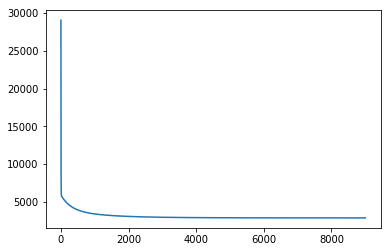

In [125]:
plt.plot(losses);

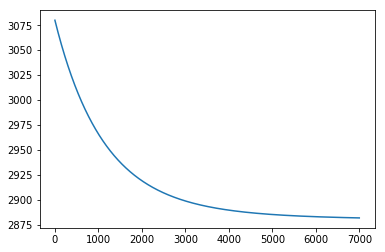

In [126]:
plt.plot(losses[2000:]);